In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#データの確認
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#欠損値の確認
test_shape = test.shape
train_shape = train.shape

print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#欠損値の確認（表化）
def kesson_table(df):
    null_val = df.isnull().sum()
    percent = 100*df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0:'欠損数',1:'%'})
    return kesson_table_ren_columns

kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [15]:
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [16]:
#trainの欠損データの処理
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")

kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [17]:
#trainのカテゴリカルデータの数字への変換
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

train.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [18]:
#testの欠損データの処理
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna("S")

kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [19]:
#testのカテゴリカルデータの数字への変換
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
#Fareの欠損値を平均で補う
test.Fare[152] = test.Fare.median()


test.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


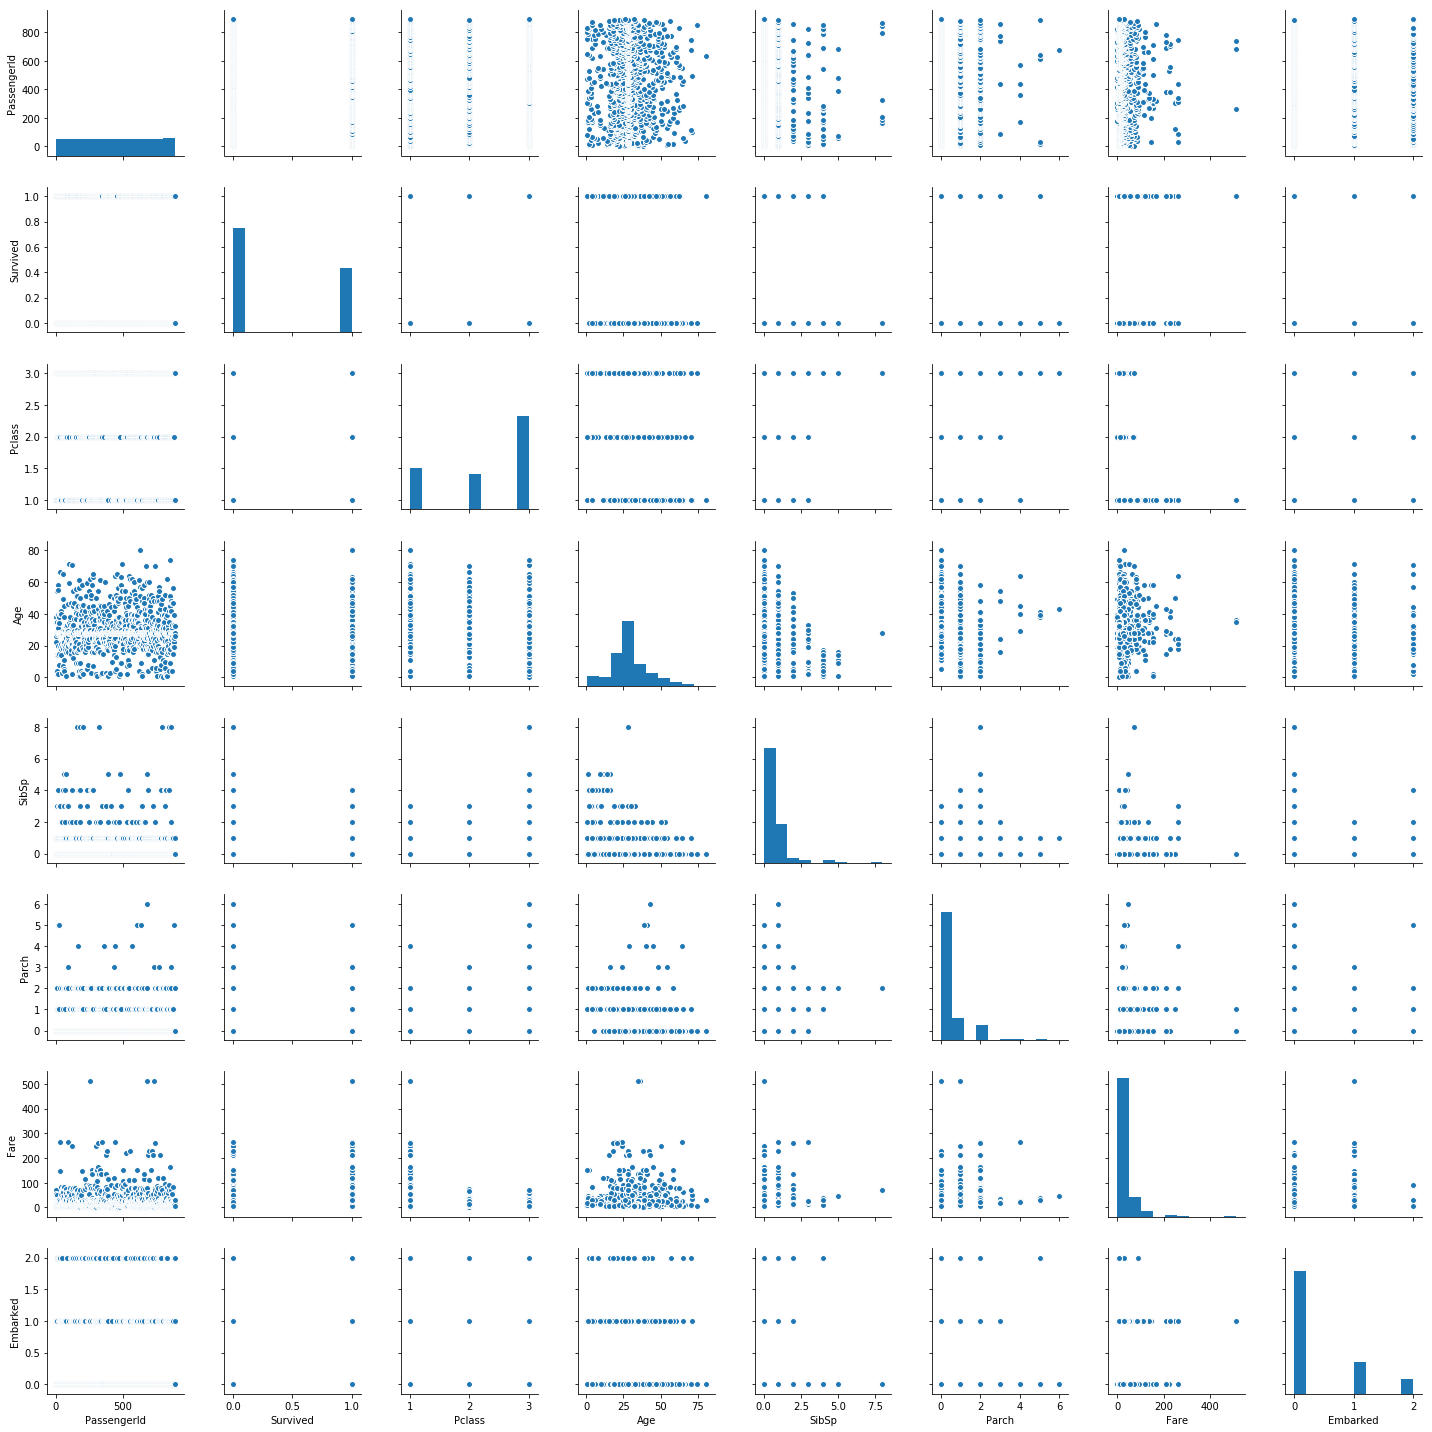

In [20]:
cols_1 = ['PassengerId', 'Survived', 'Pclass', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']
sns.pairplot(train[cols_1], size=2.5)
plt.tight_layout()
plt.show()

In [21]:
#相関係数算出
corrmat = train.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


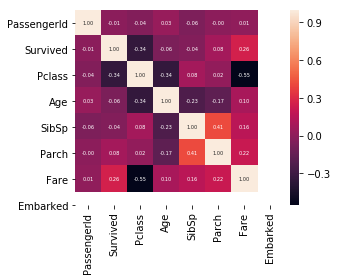

In [22]:
#ピアソンの積率相関係数
#cm = np.corrcoef(train[cols_1].values.T)        #ピアソンの積率相関係数を計算
hm = sns.heatmap(corrmat,                        #第1引数の相関係数をもとにヒートマップを作成
                 cbar=True,                      #カラーバーの表示
                 annot=True,                     #データ値の表示
                 square=True,                    #各短形の正方形化（縦と横のサイズを一致させる）
                 fmt='.2f',                      #数値などの表示形式
                 annot_kws={'size':5},           #データ値のサイズ設定
                 yticklabels=cols_1,             #行の目盛のラベル名
                 xticklabels=cols_1)             #列の目盛のラベル名
plt.tight_layout()
plt.show()

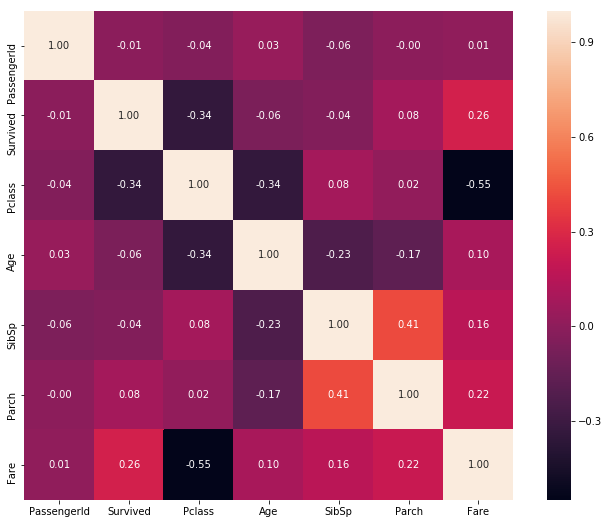

In [17]:
plt.figure(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [23]:
#trainの不要なカラムを削除
train = train.drop("Name",axis=1)
train = train.drop("Ticket",axis=1)
train = train.drop("Cabin", axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [25]:
#データの分割
from sklearn.model_selection import train_test_split
#xの特長をすべて、yをMEDV(カラムの最後の特長)に
x, y = train.iloc[:,2:].values, train.iloc[:,1:2].values
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [26]:
#アルゴリズムのインポート
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
#ロジスティック回帰の作成
clf = LogisticRegression()
clf = clf.fit(x_train, y_train)
acc_train = clf.score(x_train, y_train)
acc_test = clf.score(x_test, y_test)
print(acc_train, acc_test)

0.8025682182985554 0.7985074626865671


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#SVM
clf_2 = LinearSVC()
clf_2 = clf_2.fit(x_train, y_train)
acc_train_2 = clf_2.score(x_train, y_train)
acc_test_2 = clf_2.score(x_test, y_test)
print(acc_train_2, acc_test_2)

0.7865168539325843 0.7649253731343284


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#neighbors
clf_3 = KNeighborsClassifier()
clf_3 = clf_3.fit(x_train, y_train)
acc_train_3 = clf_3.score(x_train, y_train)
acc_test_3 = clf_3.score(x_test, y_test)
print(acc_train_3, acc_test_3)

0.7784911717495987 0.7164179104477612


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#DecisionTreeClassifier
clf_4 = DecisionTreeClassifier()
clf_4 = clf_4.fit(x_train, y_train)
acc_train_4 = clf_4.score(x_train, y_train)
acc_test_4 = clf_4.score(x_test, y_test)
print(acc_train_4, acc_test_4)

0.9791332263242376 0.7873134328358209


In [31]:
#RandomForestClassifier
clf_5 = RandomForestClassifier()
clf_5 = clf_5.fit(x_train, y_train)
acc_train_5 = clf_5.score(x_train, y_train)
acc_test_5 = clf_5.score(x_test, y_test)
print(acc_train_5, acc_test_5)

0.9646869983948636 0.8059701492537313


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#MLPClassifier
clf_6 = MLPClassifier()
clf_6 = clf_6.fit(x_train, y_train)
acc_train_6 = clf_6.score(x_train, y_train)
acc_test_6 = clf_6.score(x_test, y_test)
print(acc_train_6, acc_test_6)

0.7592295345104334 0.7761194029850746


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
